# Notebook 1 - Logique Floue

CSI4506 Intelligence Artificielle  
Automne 2020  
Preparé par Julian Templeton, Caroline Barrière et Joel Muteba

***INTRODUCTION***:   
Nous examinerons un exemple d’application de la logique floue à un problème en utilisant la programmation. Au début du notebook, des variables linguistiques qui representeront les composantes du problème seront définies. Ces variables seront utilisées parallèlement à des règles spécifiques pour résoudre un problème. Cela se fait par l’utilisation de la fuzzification, l’application de règles d’inférence ou raisonnement, et la défuzzification du résultat.

Le système de logique floue que nous construisons aidera une personne à décider de l’activité à faire et de sa durée. Cela dépendra de la proximité à la fin de semaine et du degré d'occupation de la personne. Les trois activités possibles sont: faire du yoga, jouer à des jeux et faire du ski. Les règles floues que nous définirons dans notre système de logique floue s’appliqueront à deux antécédents possibles (deux variables linguistiques) Day et Busy. Une vue d’ensemble est indiquée ci-dessous dans l’image 1.

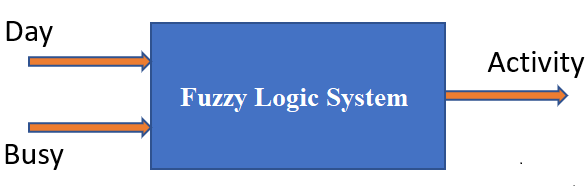    

En effectuant tous les composants de base d’un système logique flou pour résoudre un problème, vous améliorerez votre compréhension de la façon dont la logique floue peut être appliquée aux problèmes du monde réel et comment chaque composant d’un système logique flou fonctionne.    

Une note importante à garder à l’esprit lorsque vous passerez au travers du notebook est qu’il y a des classes avec une quantité importante de code, mais vous aurez seulement besoin d'**utiliser les fonctions de la classe LinguisticVariable** lors de l’exécution d’une étape qui utilise une variable de cette classe. Ainsi, ne soyez pas intimidé par la quantité de lignes de codes puisque vous aurez juste besoin d’appeler les fonctions appropriées quand cela sera nécessaire.    

La bibliothèque matplotlib sera utilisée pour ce notebook. C'est une excellente bibliothèque graphique. La bibliothèque vous permet de créer de nombreux types de graphes à partir de vos données et de les personnaliser. Pour installer matplotlib, exécutez la commande suivante dans votre console : *pip install matplotlib*

***TRAVAIL À FAIRE***:  

Parcourez le notebook en exécutant chaque cellule, une à la fois. Si l'exécution d'une cellule cause une erreur, vous pouvez résoudre le problème et ré-exécuter cette cellule.  
Recherchez **(TO DO)** pour les tâches que vous devez effectuer. Une fois que vous avez terminé, soumettez votre notebook. 

*Le notebook sera noté sur 30.  
Chaque **(TO DO)** a un certain nombre de points qui lui sont associés.*
***

In [75]:
# Imports
# Call pip install matplotlib in the console to install this library
import matplotlib.pyplot as plt

**1. Définition d'une variable linguistique.**    

Une variable linguistique est représentée par son nom, ses valeurs possibles et ses sous-ensembles flous. Cela peut être représenté par un triplet (V, X, T). Les classes ci-dessous définissent chaque composante d’une variable linguistique. Le constructeur de la classe LinguisticVariable accepte son nom (V du triplet) et les noms des valeurs associées à la variable sous la forme d’une liste (X du triplet). Les sous-ensembles flous (T dans le triplet) sont ajoutés après la définition de la variable linguistique.     

Une note importante au sujet de cette classe est que les valeurs possibles qui sont transmises à l’objet LinguisticVariable peuvent être de deux types :
1. [name1, name2, name3, ..., nameN], où chaque nom est une valeur discrète associée à la variable et sont tous des strings
2. [(num1, num2]], où num1 et num2 sont des entiers qui représentent un interval continu de nombres réels sous la forme d’un tuple     

Ces valeurs possibles sont stockées dans la liste possible_values de la classe LinguisticVariable et sont ensuite transmises à la liste value_names de la classe Values.    

Une autre remarque est que la classe Values stocke une liste d’équations mathématiques sous la variable *function*. Il s’agit d’une liste d’expressions lambda qui exécutent des fonctions mathématiques. Cette liste de fonctions doit avoir la même longueur que la liste des value_names. Cela permet à la liste value_names et à la liste des fonctions de contenir les informations associées dans le même index.

Ex: value_names[0] --> Mardi
    functions[0] --> lambda x: 0.0
    Par conséquent, lorsque nous voulons trouver la valeur floue pour le mardi à une certaine valeur x, nous appelons functions[0](x) pour obtenir cette valeur          
    
La classe FuzzySubset contient de nombreux fonctionnalités de base qui seront utilisés dans notebook. Toutefois, vous n’aurez qu’à appeler des fonctions de la classe LinguisticVariable pour éviter la manipulation d’éléments enfants.

In [76]:
# DO NOT MAKE ANY CHANGES TO THIS CLASS
# You will be asked to call the methods of this class, but NOT to change it

class LinguisticVariable():
    '''
    Represents a linguistic variable that contains a name, a set of values for this variable,
    and fuzzy subsets for the values that are used to characterise this variable.
    '''
    def __init__(self, variable_name, values):
        # The name of a variable
        self.variable_name = variable_name
        # A list of all value names
        self.possible_values = values
        # The fuzzy suvbsets that characterize variable_name
        self.fuzzy_subsets = []
        
    def add_fuzzy_subset(self, name, functions):
        '''
        Defines a fuzzy_subset of the specified name and defines functions
        for each value pass into the constructor.
        The functions are expected to be in the same order as the values that they are for.
        Ex: [val1, val2, ...], [function_for_val1, function_for_val2, ...]
        '''
        self.fuzzy_subsets.append(FuzzySubset(name, self.possible_values, functions))
        
    def fuzzification(self, fs_name, x):
        '''
        Finds the fuzzy subset with the specified name (fs_name) and fuzzifies the value x
        '''
        fs_index = [fs.name.lower() for fs in self.fuzzy_subsets].index(fs_name.lower()) 
        return self.fuzzy_subsets[fs_index].fuzzification(x)
    
    def defuzzification_average_maximas(self, fs_name):
        '''
        By going through each value (increments of 0.5 for continuous variables), returns the average
        x-location for the defuzzification of the transfered membership max_membership
        '''
        fs_index = [fs.name.lower() for fs in self.fuzzy_subsets].index(fs_name.lower())
        return self.fuzzy_subsets[fs_index].defuzzification_average_maximas()
    
    def get_fuzzy_maximum(self, fs_name):
        '''
        Finds the fuzzy subset with the specified name (fs_name) and returns its maximum
        membership degree.
        '''
        fs_index = [fs.name.lower() for fs in self.fuzzy_subsets].index(fs_name.lower()) 
        # Return its maximum membership
        return self.fuzzy_subsets[fs_index].max_membership
    
    def set_fuzzy_maximum(self, fs_name, x):
        '''
        Finds the fuzzy subset with the specified name (fs_name) and assigns x to be its maximum
        membership degree (transfers the membership to this fuzzy subset).
        '''
        fs_index = [fs.name.lower() for fs in self.fuzzy_subsets].index(fs_name.lower()) 
        # Since max_membership is already set to the maximum available y value, only update if
        # x is < the current value.
        if (x < self.fuzzy_subsets[fs_index].max_membership):
            self.fuzzy_subsets[fs_index].max_membership = x
        
    def reset_fuzzy_maximums(self):
        '''
        When a problem is complete, this will reset the maximum_membership values
        for all fuzzy variables back to the maxima in its function
        '''
        for fs in self.fuzzy_subsets:
            if (fs.values.isRangedVariable):
                fs.max_membership = self.reset_fuzzy_maximum_ranged(fs)
            else:
                fs.max_membership = self.reset_fuzzy_maximum_discrete(fs)
            
    def reset_fuzzy_maximum_discrete(self, fs):
        '''
        Returns the maxima for a fs that describes discrete variable
        '''
        vals = [] # The values for each value
        # Go through the values associated with the fuzzy subset
        for value in fs.values.value_names:
            vals.append(fs.fuzzification(value))
        # Set the variable's fuzzy subset maximum to be the maximum value in the plot
        return max(vals)
        
    def reset_fuzzy_maximum_ranged(self, fs):
        '''
        Returns the maxima for a fs that describes a range of real numbers
        '''
        for fs in self.fuzzy_subsets:
            vals = []
            # Determine the number of points to compute
            start = fs.values.value_names[0][0]
            stop = fs.values.value_names[0][1] + 1
            # Compute the points and store them
            # Increment by 0.05 to capture most changes
            for i in range(start, stop):
                # Can use libraries to make this easier, that is somthing we will explore in future notebooks
                for j in range(0, 20):
                    x = i + j * 0.05
                    vals.append(fs.fuzzification(x))
            # Set the variable's fuzzy subset maximum to be the maximum value in the plot
            return max(vals)
        
    def plot(self):
        '''
        Plots a linguistic variable and automatically detects the type of values that
        it contains
        '''
        if (self.fuzzy_subsets[0].values.isRangedVariable):
            self.plot_ranged_variable()
        else:
            self.plot_discrete_variable()
    
    def plot_discrete_variable(self):
        '''
        Plots the linguistic variable if the values are discrete
        '''
        fig = plt.figure()
        axes = fig.add_axes([0, 0, 1, 1])
        x_vals = [] # The lavels on the x-axis
        plot_values = [] # The values for each value
        y_label = "Variable " + self.variable_name
        # Go through the fuzzy subsets (only one in this notebook)
        fs = self.fuzzy_subsets[0]
        # Go through the values associated with the fuzzy subset
        for value in fs.values.value_names:
            x_vals.append(value)
            plot_values.append(fs.fuzzification(value))
        # Set the variable's fuzzy subset maximum to be the maximum value in the plot
        self.fuzzy_subsets[0].max_membership = max(plot_values)
        # Add the values to the plot
        axes.bar(x_vals, plot_values)
        # Show the plot
        plt.show()
    
    def plot_ranged_variable(self):
        '''
        Plots the linguistic variable if the values are a range
        '''
        x_label = "Number of hours" # Fixed in this notebook, otherwise would add to the tuple
        y_label = "Variable " + self.variable_name
        for fs in self.fuzzy_subsets:
            x_points = []
            y_points = []
            # Determine the number of points to compute
            start = fs.values.value_names[0][0]
            stop = fs.values.value_names[0][1] + 1
            # Compute the points and store them
            # Increment by 0.05 to capture most changes
            for i in range(start, stop):
                # Can use libraries to make this easier, that is somthing we will explore in future notebooks
                for j in range(0, 20):
                    x = i + j * 0.05
                    x_points.append(x)
                    y_points.append(fs.fuzzification(x))
            # Set the variable's fuzzy subset maximum to be the maximum value in the plot
            fs.max_membership = max(y_points)
            # Add the points to the plot
            plt.plot(x_points, y_points, label=fs.name)
        # Add the labels
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        # Define the limits of the plot
        axes = plt.gca()
        axes.set_xlim([self.fuzzy_subsets[0].values.value_names[0][0], self.fuzzy_subsets[0].values.value_names[0][1]])
        axes.set_ylim(0, 1.1)
        # Add a grid to the plot
        plt.grid()
        # Add a legend to the plot
        plt.legend()
        # Show the plot
        plt.show()

In [77]:
# DO NOT MAKE ANY CHANGES TO THIS CLASS
# This class is used by the LinguisticVariable class.  You will NOT make any calls to this class.

class Values():
    '''
    Stores the names of the values and a list of functions that describe the value for a fuzzy subset.
    values: A list of the names of the values. If a numerical range, the list will only contain
            a tuple of the form [(num1, num2)] to represent the range between num1 and num2.
            Otherwise it will be of the form [name1, name2, ..., nameN].
            Assumes that discrete items are strings (so if a number, store as a string)
    '''
    def __init__(self, value_names, functions):
        # True if the first element is a tuple of two integers (num1, num2)
        self.isRangedVariable = False
        if type(value_names[0]) is tuple:
            self.isRangedVariable = True
        # The names or range of the values
        self.value_names = value_names
        # The functions used to compute values for each value (if range, an equation)
        # The index is the same as the value index
        self.functions = functions

In [78]:
# DO NOT MAKE ANY CHANGES TO THIS CLASS
# This class is used by the LinguisticVariable class.  You will NOT make any calls to this class.

class FuzzySubset():
    '''
    Represents a single fuzzy subset.
    Accepts a name, list of values, and list of lambda equations as input.
    The values are stored as a Values object which also contain the functions that the
    fuzzy subset maps to each value.
    The max_membership parameter represents the maximum membership value that can be given
    at a given point in time.
    '''
    def __init__(self, name, values, functions):
        self.name = name
        self.values = Values(values, functions)
        self.max_membership = 1
        
    def fuzzification(self, x):
        '''
        Returns the membership value for the value x
        x: The value to be used
        '''
        membership = -1
        if self.values.isRangedVariable:
            # If a range, then x is the value within the range
            membership = self.values.functions[0](x)
        else:
            # If not a range, then x represents the index for the appropriate value
            value_index = [val.lower() for val in self.values.value_names].index(x.lower()) 
            membership = self.values.functions[value_index](0)
        return membership
    
    def defuzzification_average_maximas(self):
        '''
        Using the max_membership value, finds all values >= that value since they are the
        maximas after the transferring of membership degree.
        Loops through all key points in the plot (since it can be a continuous value) and
        averages the x values that are >= max_membership
        '''
        x_points = []
        # Determine the number of points to compute
        start = self.values.value_names[0][0]
        stop = self.values.value_names[0][1] + 1
        # Compute the points and store all maxima x-values
        # Increment by 0.05 to capture most changes
        for i in range(start, stop):
            # Can use libraries to make this easier, that is somthing we will explore in future notebooks
            for j in range(0, 20):
                x = i + j * 0.05
                # Store only if the y-value is a maxima
                if self.fuzzification(x) >= self.max_membership:
                    x_points.append(x)
        # Return the average of all x-values
        return sum(x_points) / len(x_points)

**2. Création des objets LinguisticVariable.**

Avec les définitions de classe ci-dessus, nous sommes maintenant en mesure de définir les différentes variables linguistiques qui seront utilisées dans ce notebook. Les variables suivantes seront définies :   
1. *Day*: Les valeurs sont les jours de la semaine et il n’y a qu’un seul fuzzy_subset (sous-ensemble flou) nommé *Weekend*. C’est un antécédent.
2. *Busy*: Les valeurs sont toutes des nombres réels dans l'interval [0, 10], représentant le nombre d’heures et il y a trois sous-ensembles flous {Little, Moderate, Very}. C’est un antécédent.
3. *Activity*: Les valeurs sont toutes des nombres réels dans la plage [0, 10], représentant le nombre d’heures et il y a actuellement deux sous-ensembles flous {Ski, Yoga} (vous définirez un troisième plus tard). C’est une conséquence.

La première variable linguistique à définir est pour la variable Day. Ci-dessous, vous avez toutes les étapes pour définir la variable (définir les valeurs, les variables floues et définir les fonctions pour faire correspondre une variable floue à chaque valeur).

In [79]:
# Start by defining the values (each dayy of the week)
day_values = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
# Define the Day linguistic variable
day_lv = LinguisticVariable("Day", day_values)
# Begin defining the functions for the Weekend fuzzy subset (a function for each value)
day_functions = []
# For Sunday
day_functions.append(lambda x: 0.95)
# For Monday
day_functions.append(lambda x: 0.0)
# For Tuesday
day_functions.append(lambda x: 0.0)
# For Wednesday
day_functions.append(lambda x: 0.0)
# For Thursday
day_functions.append(lambda x: 0.3)
# TODO: See (TODO) Q1 below
# For Friday
day_functions.append(lambda x: 0.7)
# For Saturday
day_functions.append(lambda x: 1.0)
# Setup the Weekend fuzzy element in the linguistic variable
day_lv.add_fuzzy_subset("Weekend", day_functions)

# Show the value for Thursday
chosenDay = "Thursday"
# For the first fuzzy subset (weekend), what is the membership of Thursday?
chosenDayMembership = day_lv.fuzzy_subsets[0].fuzzification("Thursday")
print("The Weekend membership for the value " + chosenDay + " is " + str(chosenDayMembership))

The Weekend membership for the value Thursday is 0.3


Avec la variable linguistique *day_lv* définie, nous allons la tracer pour voir le graphique

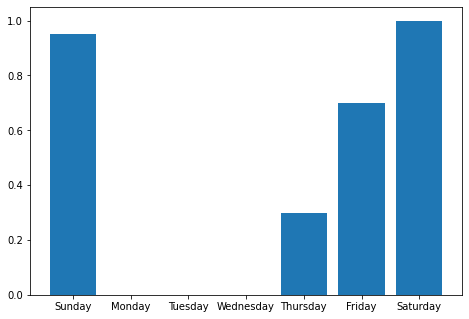

In [80]:
# Plot the linguistic variable
day_lv.plot()

**(TO DO) Q1 - 1 point** 

Dans day_lv vous voyez que le vendredi est considéré comme week-end à 0,5 (valeur d'adhésion ou membership sur l'échelle définie plus haut).  C’est trop bas, puisque vendredi est proche du week-end.  Modifiez le code ci-dessus (et réexécutez la cellule) pour que le vendredi soit condidéré comme week-end à 0,7.

**(TO DO) Q2 - 3 points** 

Avec day_lv défini, nous devons maintenant définir busy_lv pour la variable linguistique *Busy*. En suivant les modèles de code ci-dessous, continuez la définition de busy_lv.   

Rappelez-vous que selon la description définie au début de la section 2, cette variable utilise une valuer continue dans un interval. Ces values_names sont définis par un seul tuple d’entiers [(num1, num2)] plutôt qu’une liste de strings.

La figure suivante (*Image 2*) montre à quoi doit ressembler le ggraphe de la variable linguistique Busy lorsque vous exécutez la cellule suivante. Vous devrez compléter la définition de busy_lv en trouvant la fonction correcte à passer pour le sous-ensemble de floue *Very*. Des exemples de la façon dont ces équations mathématiques sont définies et ajoutées sont indiqués ci-dessous (les expressions lambda).

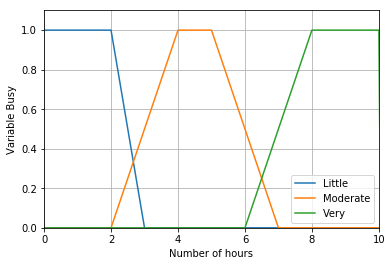

(0, 10)


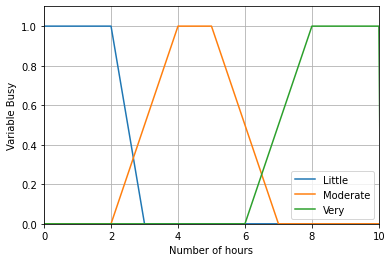

In [115]:
# Define the Busy linguistic variable
busy_values = [(0, 10)]
# TODO: Define the linguistic variable busy_lv
busy_lv = LinguisticVariable("Busy", busy_values)
busy_functions = []

# Define functions for the Little fuzzy set
# For (0, 10)
busy_functions = [lambda x: -x+3 if 2<=x<=3 else (1 if 0<=x<=2 else 0)]
# Setup the Little fuzzy element
busy_lv.add_fuzzy_subset("Little", busy_functions)

# Define functions for the Moderate fuzzy set
# For (0, 10)
busy_functions = [lambda x: (x-2)/2 if 2<=x<=4 else ((-x+7)/2 if 5<=x<=7 else (1 if 4<=x<=5 else 0))]
# Setup the Moderate fuzzy element
busy_lv.add_fuzzy_subset("Moderate", busy_functions)

# TODO: Setup the Very busy function and add that fuzzy set
# Define functions for the Very fuzzy set
# For (0, 10)
busy_functions = [lambda x: (x-6)/2 if 6<=x<=8 else(1 if 8<=x<=10 else 0)]
# Setup the Very fuzzy element
busy_lv.add_fuzzy_subset("Very" , busy_functions)

# Show an example output
print(busy_lv.fuzzy_subsets[0].values.value_names[0])
busy_lv.fuzzy_subsets[0].values.functions[0](0.1234345)

# Plot the graph
busy_lv.plot()

**(TO DO) Q3 - 4 points**  

Maintenant que nous avons défini les variables linguistiques *Day* et *Busy*, vous définirez la variable linguistique *Activity*. défini par activity_lv. Cette variable contient trois sous-ensembles flous : Yoga, Ski et Jeux. Les valeurs de cette variable sont toutes des nombres réels dans l'interval [0, 10].   

Ci-dessous est un graph (*Image 3*) de ce à quoi la variable doit ressembler après l’exécution de la cellule ci-dessous. Vous devez définir les fonctions du sous-ensemble flou *Ski* et le sous-ensemble flou *Play games* pour parvenir au graphe ci-dessous.

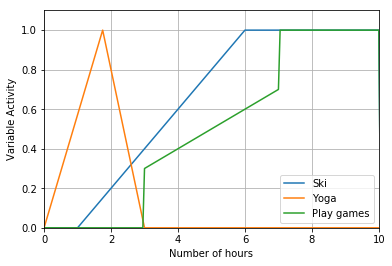

(0, 10)


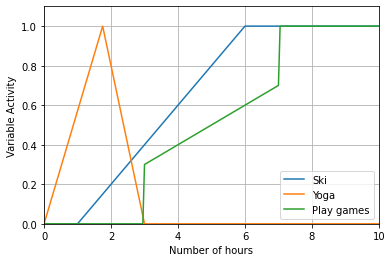

In [117]:
# TODO: Instantiate the Activity linguistic variable
# Define the Activity linguistic variable
activity_values = [(0,10)]
activity_lv = LinguisticVariable("Activity" , activity_values)
activity_functions = []

# TODO: Define the function and add the fuzzy set
# Define functions for the Ski fuzzy set
# For (0, 10)
activity_functions = [lambda x: 0 if 0<=x<=1 else ((x-1)/5 if 1<=x<=6 else 1 )]
# Setup the ski fuzzy element
activity_lv.add_fuzzy_subset("Ski", activity_functions)

# Define functions for the Yoga fuzzy set
# For (0, 10)
activity_functions = [lambda x: x/1.75 if 0<=x<=1.75 else ((-x+3)/1.25 if 1.75<=x<=3 else 0)]
# Setup the yoga fuzzy element
activity_lv.add_fuzzy_subset("Yoga", activity_functions)

# TODO: Define the function and add the fuzzy set
# Define functions for the Play games fuzzy set
# For (0, 10)
activity_functions = [lambda x: x/10 if 3<=x<=7 else (0 if 0<=x<=3 else 1) ]
# Setup the Play games fuzzy element
activity_lv.add_fuzzy_subset("Play games", activity_functions)

# Show an example output
print(activity_lv.fuzzy_subsets[0].values.value_names[0])
activity_lv.fuzzy_subsets[1].values.functions[0](2)

# Plot the graph
activity_lv.plot()

 Nous allons maintenant tracer tous les graphiques à nouveau pour voir les variables linguistiques.

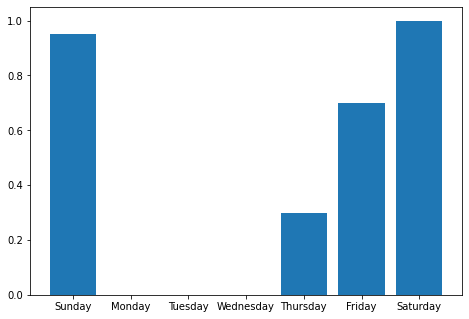

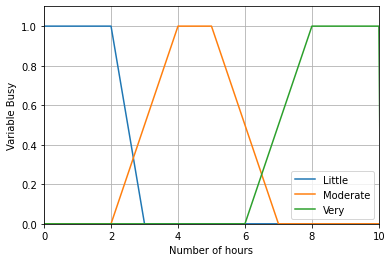

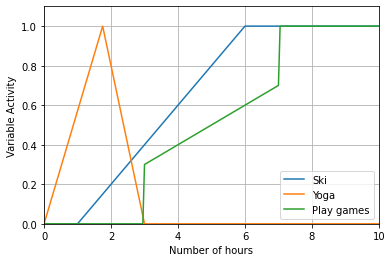

In [118]:
# Plot everything with matplot
day_lv.plot()
busy_lv.plot()
activity_lv.plot()

**3. Définition des règles floues if-then.**  

Maintenant que les variables linguistiques ont été définies, les règles floues if-then (qui seront simplement appelées règles) peuvent être définies pour être utilisées lors du raisonnement. Ces règles peuvent être définies avec les opérateurs flous *NOT*, *AND*, et *OR*. Les règles définies dans cette section seront utilisées ultérieurement avec les fonctions *NOT*, *AND* et *OR* qui seront complétées dans cette section.

Voici les deux premières règles qui seront examinées dans le reste du Notebook.     
***
*Règle 1* - Si c’est le *week-end* et que je suis *Très occupé*, je vais aller au *Yoga* (If it is the *Weekend* and I am *Very Busy*, I will go to *Yoga*)
            
*Règle 2* - Si c’est le *Week-end* et que je suis un *Peu Occupé* ou *Modérément Occupé*, je vais aller au *Ski* (If it is the *Weekend* and I am a *Little Busy* or *Moderately Busy*, I will go to *Ski*)
***

**(TO DO) Q4 - 1 point**  

Dans cette cellule, définissez une 3ième règle de votre choix en français.  Votre règle doit contenir *exactement un opérateur flou OR*, avec *exactement un opérateur flou NOT*, et où la conséquence est l’activité *Play Games*.   
***        
*Règle 3* - Si ce n'est pas le Week-end ou je suis Modérément Occupé, je vais jouer aux jeux.
***

Ensuite, les opérateurs de logique floue doivent tous être implémentés. La fonction (complète) *fuzzy_NOT* suivante est fournie comme exemple.

In [60]:
def fuzzy_NOT(num):
    '''
    Provides the returned result for the fuzzy logic NOT operator.
    num1: The first membership value
    num2: The second membership value
    returns the numerical fuzzy_NOT operator's result when applied on num1 and num2 rounded to
        the second decimal place (due to floating point imprecisions)
    '''
    return round(1 - num, 2) 

**(TO DO) Q5 - 2 points**  

Dans les deux cellules ci-dessous, complétez les définitions des fonctions fuzzy_OR et fuzzy_AND. Pour plus de détails sur ces fonctions, consultez vos notes de cours.

In [84]:
# TODO: Complete the function
def fuzzy_OR(num1,num2):
    '''
    Provides the returned result for the fuzzy logic OR operator.    
    '''
    return max(num1, num2)

In [85]:
# TODO: Complete the function
def fuzzy_AND(num1,num2):
    '''
    Provides the returned result for the fuzzy logic AND operator.
    '''
    return min(num1, num2)

**4. Fuzzification.**  
La première étape pour résoudre un problème est d’effectuer la *fuzzification*. Ce processus a déjà été programmé pour vous dans la classe LinguisticVariable. Cette fonction *.fuzzification(fs_name, x)* nécessite le nom du sous-ensemble flou et la valeur dont vous souhaitez obtenir l’appartenance du sous-ensemble flou à l’entrée.

Jetons un coup d’œil à l’exemple de fuzzification suivant. Ceci fuzzifie l’instruction suivante:   
*C’est jeudi et ce premier module me prendra 2,5 heures à faire.*

In [119]:
print("It is Thursday and this first module will take me 2.5 hours to do.")
# The first value is Thursday, so we will get the membership of weekend for the value Thursday
weekend_membership_test = day_lv.fuzzification("Weekend", "Thursday")
print("Thursday has the membership " + str(weekend_membership_test) + " for being the Weekend.")
# The second value is that the work will be 2.5 hours, so how Little, Moderate, and Very busy is that?
little_membership_test = busy_lv.fuzzification("Little", 2.5)
print("2.5 hours has the membership " + str(little_membership_test) + " for being Little busy")
moderate_membership_test = busy_lv.fuzzification("Moderate", 2.5)
print("2.5 hours has the membership " + str(moderate_membership_test) + " for being Moderate busy")
very_membership_test = busy_lv.fuzzification("Very", 2.5)
print("2.5 hours has the membership " + str(very_membership_test) + " for being Very busy")

It is Thursday and this first module will take me 2.5 hours to do.
Thursday has the membership 0.3 for being the Weekend.
2.5 hours has the membership 0.5 for being Little busy
2.5 hours has the membership 0.25 for being Moderate busy
2.5 hours has the membership 0 for being Very busy


ATTENTION --- Le problème que nous voudrons résoudre à partir de maintenant est le suivant: 
***

    Déclaration du problème: C’est vendredi et j’ai encore 4 heures de travail à faire. Quelle activité vais-je faire et pour combien de temps?
***
    
Ce problème sera utilisé pour les prochaines sections, alors assurez-vous de vous y référer en cas de besoin. 

**(TO DO) Q6 - 2 points**

Effectuez la fuzzification pour le problème (défini ci-dessus) dans la cellule ci-dessous.

In [120]:
# TODO: Add in the fuzzification calls for the appropriate linguistic variables.
# Weekend fuzzification
weekend_membership = day_lv.fuzzification("Weekend" , "Friday")
print("Friday has the membership " + str(weekend_membership) + " for being the Weekend")
# Little fuzzification
little_membership = busy_lv.fuzzification("Little" , 4)
print("4 hours has the membership " + str(little_membership) + " for being Little Busy")
# Moderate fuzzification
moderate_membership = busy_lv.fuzzification("Moderate" , 4)
print("4 hours has the membership " + str(moderate_membership) + " for being Moderate Busy")
# Very fuzzification
very_membership = busy_lv.fuzzification("Very" , 4)
print("4 hours has the membership " + str(very_membership) + " for being Very Busy")

Friday has the membership 0.7 for being the Weekend
4 hours has the membership 0 for being Little Busy
4 hours has the membership 1.0 for being Moderate Busy
4 hours has the membership 0 for being Very Busy


**5. Application des règles d'inférences ou de raisonnements.**  

Maintenant que la fuzzification de l’énoncé du problème est terminée, nous pouvons commencer à appliquer les opérateurs de logique floue qui ont été programmés ci-dessus en nous servant des règles que nous avons définies dans la partie 3 de ce notebook.     

Vous trouverez ci-dessous un exemple d’application des opérateurs de la règle 1 avec les données de fuzzification de l’étape précédente.  

Lors de l’application des règles d’inférence, nous établissons la priorité suivante (ordre d’application des opérateurs):   
1. fuzzy_NOT: Toutes les instances de NOT doivent être appliquées en premier
2. fuzzy_OR : Toutes les instances de OR doivent être appliquées ensuite
3. fuzzy_AND: Toutes les instances de AND doivent être appliquées en dernier

In [121]:
print("Rule 1 - If it is the Weekend and I am Very Busy, I will go to Yoga.")
# If it is the Weekend AND I am Very busy -> What is the membership of going to yoga
rule1_membership_test = fuzzy_AND(weekend_membership_test, very_membership_test)
print("The membership value for Yoga is " + str(rule1_membership_test))

Rule 1 - If it is the Weekend and I am Very Busy, I will go to Yoga.
The membership value for Yoga is 0


**(TO DO) Q7 - 2 points**  

Pour chacune des trois règles définies dans la partie 3 de ce notebook, les deux fournies et celle que vous avez écrite, appliquez correctement les opérateurs pour mettre en place les règles. Cela doit être fait dans la cellule ci-dessous, avec les résultats formatés comme on le voit dans l’exemple ci-dessus. La règle 1 a été indiquée dans la cellule précédente et a déjà été définie pour vous ci-dessous.

In [122]:
# RULE 1
print("Rule 1 - If it is the Weekend and I am Very Busy, I will go to Yoga.")
rule1_membership = fuzzy_AND(weekend_membership, very_membership)
print("The membership value for Yoga is " + str(rule1_membership))

#TODO
# RULE 2
print("Rule 2 - If it is the Weekend and I am a Little Busy or Moderately Busy, I will go to Ski.")
rule2_membership = fuzzy_AND(weekend_membership, fuzzy_OR(little_membership , moderate_membership))
print("The membership value for Ski is " + str(rule2_membership))

#TODO
# RULE 3
print("Rule 3 - If it is not the Weekend or I am Moderately Busy, I will Play games")
rule3_membership = fuzzy_OR(fuzzy_NOT(weekend_membership), moderate_membership)
print("The membership value for Play games is " + str(rule3_membership))

Rule 1 - If it is the Weekend and I am Very Busy, I will go to Yoga.
The membership value for Yoga is 0
Rule 2 - If it is the Weekend and I am a Little Busy or Moderately Busy, I will go to Ski.
The membership value for Ski is 0.7
Rule 3 - If it is not the Weekend or I am Moderately Busy, I will Play games
The membership value for Play games is 1.0


**(TO DO) Q8 - 2 points**  

Nous devons maintenant transférer le degré d'appartenance de l’antécédent sur la conséquence de chaque règle. Cela se fait en appelant la fonction LinguisticVariable.set_fuzzy_maximum(fs_name, x). Cette fonction transfère le degré d’adhésion x à un sous-ensemble flou dont le nom est fs_name (dans ce cas, la conséquence).   

Votre tâche consiste à transférer les adhésions obtenues ci-dessus sur les sous-ensembles flous d’activité correspondants.

In [123]:
# TODO: Transfer the membership degrees to the activity_lv fuzzy subsets 
yoga_membership = activity_lv.set_fuzzy_maximum("Yoga", rule1_membership)
ski_membership = activity_lv.set_fuzzy_maximum("Ski" , rule2_membership)
play_games_membership = activity_lv.set_fuzzy_maximum("Play games", rule3_membership)

**6. Défuzzification.**  

La dernière étape pour résoudre l’énoncé de problème est d’effectuer la défuzzification. Ce processus consiste à prendre une entrée floue et à produire une sortie nette basée sur l’une des nombreuses méthodes potentielles. Pour ce notebook, nous utiliserons la moyenne des valeurs de l'axe x pour lesquelles apparaissent les valeurs maximales trouvées sur l’axe y. Bien que des méthodes plus robustes existent, nous allons simplement récupérer les emplacements des valeurs maximales en récupérant de nombreux points clés du graphe et en faisant la moyenne des valeurs x qui produisent la valeur y maximale.   
  
Dans la section précédente, vous avez transféré les adhésions que vous avez obtenues pour qu'elles soient le degré d’adhésion maximum de la conséquence. Ainsi, la valeur maximale y apparaît à chaque point supérieur ou égal à l’appartenance transférée (s’il y en a), ou à la valeur maximale globale autrement.   

La défuzzification doit être appliquée *uniquement* au sous-ensemble flou qui contient le plus haut transfert

**(TO DO) Q9 - 4 points**   

Votre tâche est maintenant d’effectuer le processus de défuzzification et de répondre à l’énoncé de problème. Il s’agit de trois parties que vous devez compléter.    
 
1. Trouvez quel sous-ensemble flou correspondant à la variable linguistique Activity contient la valeur d’adhésion la plus haute ou importante après le transfert d’adhésion que vous avez effectué à la question 8. Vous pouvez accéder à la valeur d’appartenance maximale d’un sous-ensemble flou dans une variable linguistique en appelant *LinguisticVariable.get_fuzzy_maximum(fs_name)*, où fs_name est le nom du sous-ensemble flou. Vous devez imprimer le nom du sous-ensemble flou avec la valeur d’appartenance la plus importante (à partir des appels de fonction) et la valeur d’accompagnement.     
2. Pour seul le sous-ensemble flou qui contient la valeur d’appartenance maximale (l’activité sélectionnée), effectuez la défuzzification sur son adhésion maximale pour obtenir la sortie nette. Pour effectuer cette défuzzification en effectuant la moyenne des maxima, appelez la fonction *LinguisticVariable.defuzzification_average_maximas(fs_name)*, où fs_name est le nom du sous-ensemble de la variable floue. Imprimez la sortie nette.     
3. À partir de ce qui précède, remplissez la cellule fournie avec la solution à l’instruction de problème (quelle activité sera effectuée et pour combien de temps). 

In [124]:
# (TO DO) Q9 - Part 1
# TODO: Determine which fuzzy subset contains the maximum membership value
# Transférer le degreé d'appartenance à l'ensemnble flou Yoga
max_yoga = activity_lv.get_fuzzy_maximum("Yoga")

# Transférer le degreé d'appartenance à l'ensemnble flou Ski
max_ski = activity_lv.get_fuzzy_maximum("Ski")

# Transférer le degreé d'appartenance à l'ensemnble flou Play games
max_play_games = activity_lv.get_fuzzy_maximum("Play games")

# Trouver l'ensemble flou qui a le niveau d'appartenance le plus élevée
max_value = max(max_yoga, max_ski, max_play_games)
fsname=""
if max_value == max_yoga:
    fsname = "Yoga"
elif max_value == max_ski:
    fsname = "Ski"
else:
    fsname = "Play games"

...
# TODO: Print the maximum mebership value and the name of the fuzzy subset
print("The maximum membership is " + str(max_value) + " for the fuzzy subset " + fsname)

The maximum membership is 1 for the fuzzy subset Play games


In [125]:
# (TO DO) Q9 - Part 2
# TODO: Perform the defuzzification
defuzz = activity_lv.defuzzification_average_maximas(fsname)
# TODO: Print the crisp output | Écrivez la sortie nette
print("The defuzzification value is " +str(defuzz))

The defuzzification value is 9.0


**(TO DO) Q9 - Part 3**     
Écrivez la réponse au problème ici.     
L'activité choisie est "Play games" pour une durée de 9 heures.

**7. Résoudre votre propre problème.**  

Maintenant que vous avez terminé l’ensemble du processus de résolution d’un problème avec une logique floue, vous travaillerez avec un nouveau problème pour le résoudre par l’utilisation des variables linguistiques et des règles que nous avons définies ci-dessus. Voici chaque étape que vous devrez faire dans les cellules ci-dessous.

**(TO DO) Q10 - 9 points**  

L’énoncé du problème que vous résoudrez par vous-même est :   
***   
    Déclaration du problème: C’est dimanche et j’ai encore 7 heures de travail à faire. Quelle activité vais-je faire et pour combien de temps?
***   
     
1. Effectuer la fuzzification et imprimer les résultats de la fuzzification.    
2. Appliquer les opérateurs de logique floue sur l’antécédent des trois règles utilisées dans ce notebook.    
3. Transférer le degré d’appartenance de l’antécédent sur la conséquence.
4. Effectuer la défuzzification et imprimer la réponse au problème (ne pas oublier de trouver l’appartenance maximale).

In [126]:
# Reset max_membership variable for all fuzzy sets in all linguistic variables
# This must be called to properly reset the state of the linguistic variable.
day_lv.reset_fuzzy_maximums()
busy_lv.reset_fuzzy_maximums()
activity_lv.reset_fuzzy_maximums()

In [127]:
# (TO DO) Q10 - Part 1
# Perform the fuzzification here and print the results
weekend_appartenance = day_lv.fuzzification("Weekend" , "Sunday")
little_appartenance = busy_lv.fuzzification("Little" , 7)
moderate_appartenance = busy_lv.fuzzification("Moderate" , 7)
very_appartenance = busy_lv.fuzzification("Very" , 7)


In [128]:
# (TO DO) Q10 - Part 2
# Apply the fuzzy logic operators on the antecedent of the three rules used throughout this notebook

# TODO
# RULE 1
print("Rule 1 - If it is the Weekend and I am Very Busy, I will go to Yoga.")
rule1_membership = fuzzy_AND(weekend_appartenance, very_appartenance)
print("The membership value for Yoga is " + str(rule1_membership))

#TODO
# RULE 2
print("Rule 2 - If it is the Weekend and I am a Little Busy or Moderately Busy, I will go to Ski.")
rule2_membership = fuzzy_AND(weekend_appartenance, fuzzy_OR(little_appartenance, moderate_appartenance))
print("The membership value for Ski is " + str(rule2_membership))

#TODO
# RULE 3
print("Rule 3 - If it is not the Weekend or I am Moderately Busy, I will Play games")
rule3_membership = fuzzy_OR(fuzzy_NOT(weekend_appartenance), moderate_appartenance)
print("The membership value for Play games is " + str(rule3_membership))

Rule 1 - If it is the Weekend and I am Very Busy, I will go to Yoga.
The membership value for Yoga is 0.5
Rule 2 - If it is the Weekend and I am a Little Busy or Moderately Busy, I will go to Ski.
The membership value for Ski is 0
Rule 3 - If it is not the Weekend or I am Moderately Busy, I will Play games
The membership value for Play games is 0.05


In [129]:
# (TO DO) Q10 - Part 3
# Transfer the membership degree of the antecedent on the consequence
yoga_membership = activity_lv.set_fuzzy_maximum("Yoga", rule1_membership)
ski_membership = activity_lv.set_fuzzy_maximum("Ski" , rule2_membership)
play_games_membership = activity_lv.set_fuzzy_maximum("Play games", rule3_membership)

In [130]:
# Perform the defuzzification process
# TODO: First find the maximum
max_yoga = activity_lv.get_fuzzy_maximum("Yoga")
max_ski = activity_lv.get_fuzzy_maximum("Ski")
max_play_games = activity_lv.get_fuzzy_maximum("Play games")
max_value = max(max_yoga, max_ski, max_play_games)
fsname=""
if max_value == max_yoga:
    fsname = "Yoga"
elif max_value == max_ski:
    fsname = "Ski"
else:
    fsname = "Play games"
# TODO: Print the maximum mebership value and the name of the fuzzy subset
print("The maximum membership is " + str(max_value) + " for the fuzzy subset " + fsname)
# TODO: Perform the defuzzification
defuzz = activity_lv.defuzzification_average_maximas(fsname)
# Print the answer to the problem
print("I will do " + fsname + " for " + str(defuzz) + " hours.")

The maximum membership is 0.5 for the fuzzy subset Yoga
I will do Yoga for 1.625 hours.


***SIGNATURE:***  Mon nom est --Bhavika Sewpal-------, et mon numéro d'étudiant(e) est -300089940--------.  Je certifie être l'auteur de ce devoir.